### Analyzing the Stroop Effect
In this project, you will investigate a classic phenomenon from experimental psychology called the Stroop Effect. 

# Background

<img src="stroop-test-2.jpg">

"In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task.

When the name of a color (e.g., "blue", "green", or "red") is printed in a color which is not denoted by the name (i.e., the word "red" printed in blue ink instead of red ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color.

The effect is named after John Ridley Stroop, who first published the effect in English in 1935."

[More about the Stroop Effect from Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import scipy.stats as stats

In [2]:
df = pd.read_csv('stroopdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### (1) Independent variable and dependent variable

* The independent variable: the type of test wether congruent or incongruent (the colors of the words and wether the written word and font color are matching or not matching). 
* the dependent variable: response time

Since the time recorded are dependent upon on whether the words presented were congruent or incongruent, then we can say that the word's congruence is the independent variable and time taken to recognize the word as the dependent variable

### (2) Hypotheses for this task

We want to test the null hypothesis, H0, that the true mean difference is zero between the two data sets. That is, the color font to word mismatch will not impact the response time for correctly reading the word. 

H0 (Null Hypothesis): There is no difference in population means of response time under incongruent and congruent conditions:

    H0: μI = μC 

H1 (Alternate Hypothesis): Population means under the incongruent condition does not equal than population means under the congruent condition, and they are thus significantly different:

    HA:  μI ≠ μC
    
    
Tests used: Paired T-Test, also called the Dependent t-test for Paired Samples, and the t-score
*  paired T-Test, because data was collected twice from each participant (assuming that the population data has a normal distribution). This test will show if the mean of incongruent words is statistically different from the congruent words at an alpha of 0.05. This test requires that data be normally distributed. 
* t-score to test the Null Hypothesis because the sample size is below 30 (sample of n=24) and has an unknown population standard deviation.

    μC : The congruent population's response time mean
    
    μI : The incongruent population's response time mean
    
[Read more about paired T tests](https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/)

### (3) Descriptive statistics regarding this dataset, including measures of central tendency and variability

In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


* n= 24
* sample mean = 14.05 seconds for congruent 22.01 seconds for incongruent
* standard deviation = 3.55 seconds for congruent 4.79 seconds for incongruent

* Congruent - x̄C = 14.05, σC = 3.55 seconds
* Incongruent - x̄I = 22.01, σI = 4.79 seconds

### (4) Visualization(s) showing the distribution of the sample data

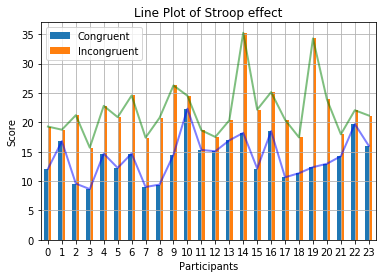

In [6]:
df.plot(kind='bar')
df.Congruent.plot(kind = 'line', color = 'b',label = 'Congruent',linewidth=2,alpha = 0.5,grid = True)
df.Incongruent.plot(color = 'g',label = 'Incongruent',linewidth=2, alpha = 0.5,grid = True)
plt.xlabel('Participants')              
plt.ylabel('Score')
plt.title('Line Plot of Stroop effect');

Every participant's reaction time was lower on the congruent test than the incongruent test. 

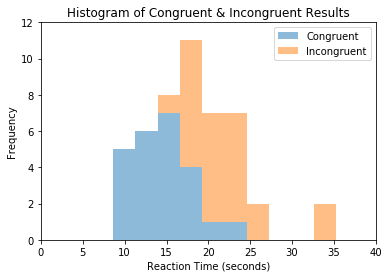

In [7]:
title = 'Histogram of Congruent & Incongruent Results'
g = df.plot(title=title, kind='hist', alpha= 0.5, bins=10,stacked=True)
plt.xlabel('Reaction Time (seconds)')
size = plt.axis([0,40,0,12])

Participants are faster at responding on the Congruent portion. The Incongruent portion takes participants longer. The histogram of our data seems to be largely normally distributed.

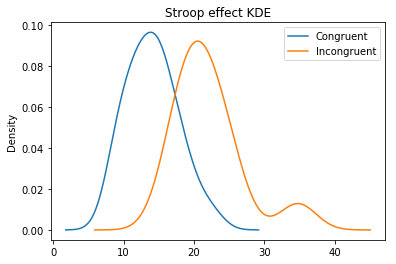

In [8]:
df.plot.kde()
plt.title('Stroop effect KDE');

Both samples look normally distributed with a similar variance.

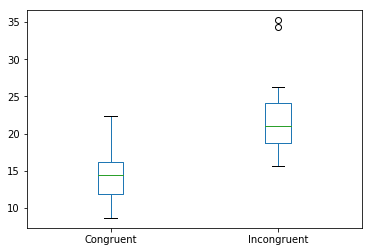

In [9]:
df[['Congruent', 'Incongruent']].plot(kind='box');

The median for the incongruent results is higher than the median for the congruent results. We can see two outliers. 

In [10]:
# https://pythonfordatascience.org/paired-samples-t-test-python/
df['df_difference'] = df['Congruent'] - df['Incongruent']

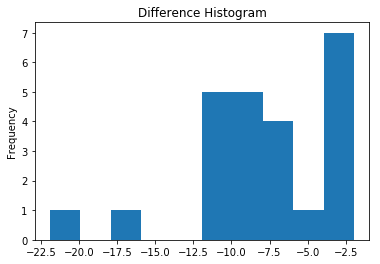

In [11]:
df['df_difference'].plot(kind='hist', title= 'Difference Histogram');

We can see some outliers. 

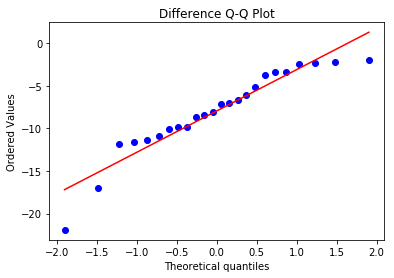

In [12]:
stats.probplot(df['df_difference'], plot= plt)
plt.title('Difference Q-Q Plot');

The data seems to be normally distributed, the data more or less appears on the red line. There is some deviation from normality, but it does not appear to be severe.

In [13]:
#test to see if the data is normally distributed, using the Shapiro-Wilk test for normality.
stats.shapiro(df['df_difference'])
#The first value is the W test value
#the second value it the p-value

(0.9104195833206177, 0.036017220467329025)

### (5)  Statistical Analysis

* df = 24 – 1 = 23 #degrees of freedom (df) = n - 1
* α = 0.05 at a 95% confidence interval
* tcritical = ±2.0687
μI - μC = 22.016-14.051 = 7.965

In [14]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html
#Calculates the T-test on TWO RELATED samples of scores, a and b.
#This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.
TStatistic, pvalue = stats.ttest_rel(df['Incongruent'], df['Congruent'])
print("T Statistic = "+ str(TStatistic))
print("pvalue = "+ str(pvalue))

T Statistic = 8.02070694411
pvalue = 4.10300058571e-08


In [15]:
# https://www.programcreek.com/python/example/94816/scipy.stats.t.ppf
# Calculate t-critical for alpha level 0.005 
# https://stats.stackexchange.com/questions/271258/using-scipy-t-ppf-to-get-p-value

alpha = 0.05 # We set $\alpha$ equal to .05 then our confidence level is 0.95. 
Tcritical_value = stats.t.ppf(q=alpha, df=23) #Calculate T critical value 
print ("T critical_value = "+ str(Tcritical_value))

T critical_value = -1.71387152775


A paired sample t-test was used to analyze the Congruent results (no color word to font color mismatch test) and Incongruent results (color word to font color mismatch test) to test if the Incongruent test had an affect on reaction time. 

Because the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two sets of results. 

We reject the null hypothesis, with a 95% Confidence level, that there is no difference in population mean times between congruent and incongruent conditions.

see also: 
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
3. https://plot.ly/python/t-test/#two-sample-t-test

In [17]:
import pdfkit
pdfkit.from_file('Test_a_Perceptual_Phenomenon.html', 'Test_a_Perceptual_Phenomenon.pdf')

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


True